In [1]:
# Import dependencies
%matplotlib inline
import requests
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from pprint import pprint

In [2]:
df_price_to_income = pd.read_csv('Zillow CSV Files/Affordability_Wide_2018Q3_Public.csv')
df_price_to_income.head()

,RegionID,RegionName,SizeRank,Index,HistoricAverage_1985thru1999,1979-03,1979-06,1979-09,1979-12,1980-03,...,2016-06,2016-09,2016-12,2017-03,2017-06,2017-09,2017-12,2018-03,2018-06,2018-09
0,102001,United States,0,Price To Income,2.785405,2.926373,2.963026,2.968129,2.966181,2.952436,...,3.258351,3.291534,3.328243,3.365207,3.401633,3.437533,3.472917,3.530983,3.568495,3.594049
1,394913,"New York, NY",1,Price To Income,3.917370,2.942473,2.972091,2.982716,2.974039,3.018489,...,5.286716,5.303699,5.345488,5.378943,5.467491,5.514300,5.551044,5.613744,5.629456,5.627958
2,753899,"Los Angeles-Long Beach-Anaheim, CA",2,Price To Income,4.451252,4.026345,4.149794,4.218370,4.282153,4.308031,...,8.538745,8.656300,8.771729,8.848770,8.887717,8.977212,9.072534,9.190813,9.170177,9.166862
3,394463,"Chicago, IL",3,Price To Income,2.957102,3.035188,3.046280,2.985919,2.971720,2.891842,...,2.993223,3.010219,3.034393,3.056091,3.076010,3.094185,3.122299,3.168820,3.171633,3.168705
4,394514,"Dallas-Fort Worth, TX",4,Price To Income,3.091546,3.886558,4.026230,4.103539,4.128668,4.130555,...,2.878947,2.956285,3.025885,3.087849,3.139863,3.194250,3.260007,3.377361,3.421810,3.449437


In [3]:
aus_pti = df_price_to_income.loc[
    (df_price_to_income["RegionName"] == "Austin, TX") & 
    (df_price_to_income["Index"] == "Price To Income"), :]
aus_pti

,RegionID,RegionName,SizeRank,Index,HistoricAverage_1985thru1999,1979-03,1979-06,1979-09,1979-12,1980-03,...,2016-06,2016-09,2016-12,2017-03,2017-06,2017-09,2017-12,2018-03,2018-06,2018-09
35,394355,"Austin, TX",35,Price To Income,3.889234,4.925206,4.850799,5.003052,5.170379,4.961189,...,3.700067,3.737095,3.755087,3.799525,3.82704,3.820349,3.860843,3.932923,3.94829,3.97007


In [4]:
aus_pti = aus_pti.loc[:,'2016-03'::]
aus_pti

,2016-03,2016-06,2016-09,2016-12,2017-03,2017-06,2017-09,2017-12,2018-03,2018-06,2018-09
35,3.635865,3.700067,3.737095,3.755087,3.799525,3.82704,3.820349,3.860843,3.932923,3.94829,3.97007


In [5]:
aus_pti = aus_pti.transpose()
aus_pti_plot = aus_pti.reset_index()

aus_pti_plot.rename(
    index=str,
    columns={35:'Austin Price to Income Ratio',
             'index': 'Years'},
    inplace=True)


In [6]:
aus_pti_plot.head()

,Years,Austin Price to Income Ratio
0,2016-03,3.635865
1,2016-06,3.700067
2,2016-09,3.737095
3,2016-12,3.755087
4,2017-03,3.799525


In [7]:
natl_pti = df_price_to_income.loc[
    (df_price_to_income["RegionName"] == "United States") & 
    (df_price_to_income["Index"] == "Price To Income"), :]
natl_pti

,RegionID,RegionName,SizeRank,Index,HistoricAverage_1985thru1999,1979-03,1979-06,1979-09,1979-12,1980-03,...,2016-06,2016-09,2016-12,2017-03,2017-06,2017-09,2017-12,2018-03,2018-06,2018-09
0,102001,United States,0,Price To Income,2.785405,2.926373,2.963026,2.968129,2.966181,2.952436,...,3.258351,3.291534,3.328243,3.365207,3.401633,3.437533,3.472917,3.530983,3.568495,3.594049


In [8]:
natl_pti = natl_pti.loc[:,'2016-03'::]
natl_pti

,2016-03,2016-06,2016-09,2016-12,2017-03,2017-06,2017-09,2017-12,2018-03,2018-06,2018-09
0,3.227934,3.258351,3.291534,3.328243,3.365207,3.401633,3.437533,3.472917,3.530983,3.568495,3.594049


In [9]:
natl_pti = natl_pti.transpose()
natl_pti_plot = natl_pti.reset_index()

natl_pti_plot.rename(
    index=str,
    columns={0:'National Price to Income Ratio',
             'index': 'Years'},
    inplace=True)


In [10]:
natl_pti_plot.head()

,Years,National Price to Income Ratio
0,2016-03,3.227934
1,2016-06,3.258351
2,2016-09,3.291534
3,2016-12,3.328243
4,2017-03,3.365207


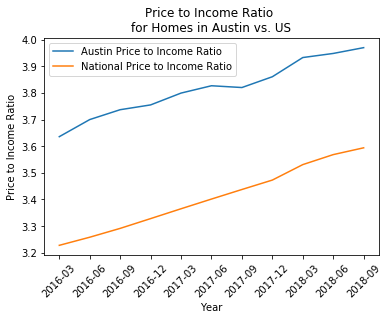

In [11]:
x_axis = np.arange(0, len(aus_pti_plot['Years']))
tick_loc = []
for x in x_axis:
    tick_loc.append(x)


plt.xticks(tick_loc, aus_pti_plot['Years'], rotation=45)    
    
plt.plot(x_axis, aus_pti_plot['Austin Price to Income Ratio'])
plt.plot(x_axis, natl_pti_plot['National Price to Income Ratio'])


plt.xlabel('Year')
plt.ylabel('Price to Income Ratio')
plt.title('Price to Income Ratio \n'
            'for Homes in Austin vs. US')


plt.legend(loc='best')
plt.show()

In [12]:
plt.savefig('Rental Plots/PtoI Ratio_Aus_v_US.png')

<Figure size 432x288 with 0 Axes>